<a href="https://colab.research.google.com/github/saxonyanders/saxonyanders/blob/main/money_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mesa --quiet --upgrade

In [2]:
pip install seaborn

In [3]:
import mesa

import seaborn as sns #data visuals

import numpy as np #mathematical tools

import pandas as pd

In [4]:
#RUN THIS EACH TIME .PY FILE UPDATED
import importlib
import money_model  # First import
importlib.reload(money_model)  # Force reload of .py file
print("Module reloaded successfully")

Module reloaded successfully


In [5]:
model = money_model.MoneyModel(10, 10, 10)

In [6]:
from money_model import MoneyModel

starter_model = MoneyModel(10, 10, 10) #this tells the model how many agents to create, eg 10
starter_model.step() #this performs the action in the 'do' line on MoneyModel

In [7]:
from money_model import MoneyModel

In [8]:
model = MoneyModel(10, 10, 10) #model creates 10 agents on 10x10 grid
for _ in range(
    30
):
    model.step() #runs 30 steps of the model

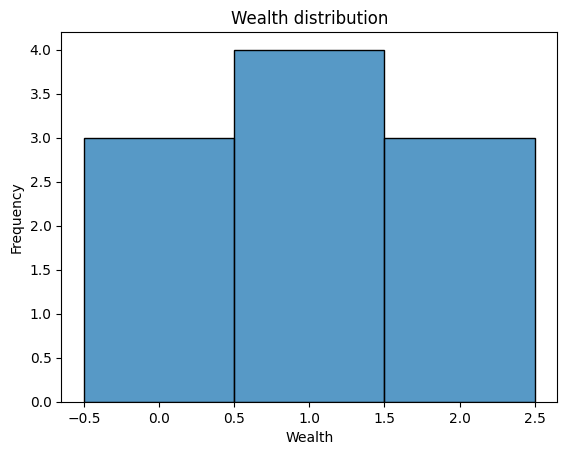

In [9]:
agent_wealth = [a.wealth for a in model.agents]
g = sns.histplot(agent_wealth, discrete=True)
g.set(
      title="Wealth distribution",
      xlabel="Wealth",
      ylabel="Frequency"
); #creates a histogram of all of our agents wealth using seaborn to visualise it

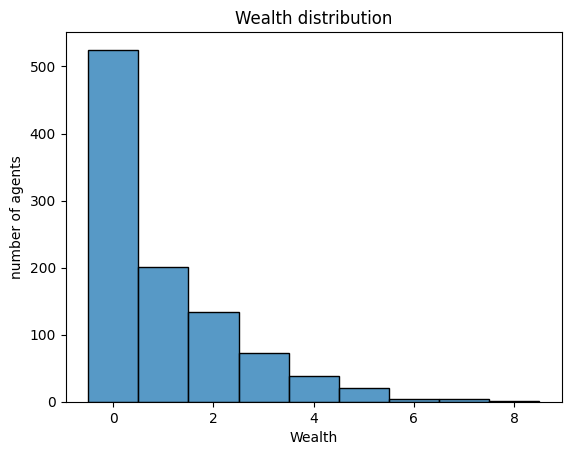

In [10]:
all_wealth = []
for _ in range(100): #runs the model 100 times, _ replaces the 'variable' which would otherwise be i and then give the step number for each answer of the loop
    model = MoneyModel(10, 10, 10) #10 agents, 10x10 grid
    for _ in range(30): # 30 steps for each model
        model.step()

    for agent in model.agents:
        all_wealth.append(agent.wealth) #appends agent.wealth to all_wealth results

g = sns.histplot(all_wealth, discrete=True) #set histogram bins to be integers as agents ca only have whole numbers of wealth
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents"); #create a histogram of all_wealth


In [11]:
model = MoneyModel(100, 10, 10) #100 agents, 10x10 grid, 20 steps
for _ in range(20):
    model.step()

[Text(0.5, 1.0, 'number of agents on each cell of the grid')]

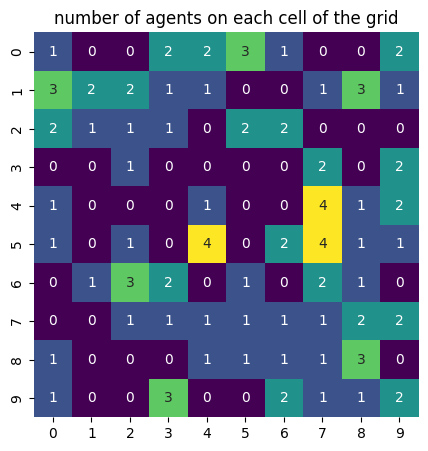

In [12]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter(): #coord iter looks at every cell in grid and gives no. of contents
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True) #heatmap based on the agent_counts, sets colour map, and annot=True displays the values in each cell
g.figure.set_size_inches(5 ,5) #sets the size of grid to 5x5 inches
g.set(title="number of agents on each cell of the grid")

In [13]:
model = MoneyModel(100, 10, 10) #100 agents, 10x10 grid, 100 steps
for _ in range(100):
    model.step()

In [14]:
gini_data = model.datacollector.get_model_vars_dataframe()#pandas data frame of the gini coefficient of each agent
print(gini_data)

      Gini
0   0.0000
1   0.5566
2   0.6222
3   0.6920
4   0.7108
..     ...
95  0.7142
96  0.6912
97  0.7088
98  0.6752
99  0.6606

[100 rows x 1 columns]


[Text(0.5, 1.0, 'Gini Coefficient over Time'),
 Text(0, 0.5, 'Gini Coefficient')]

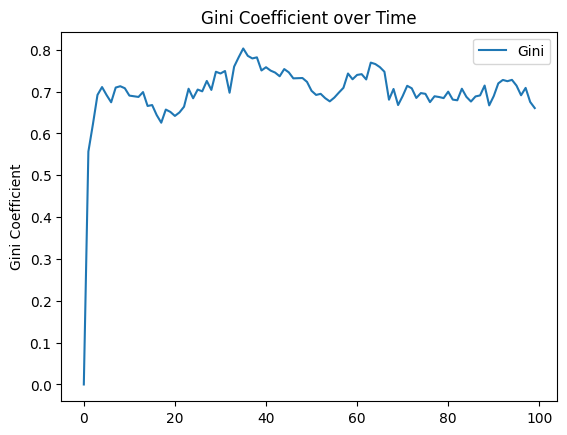

In [15]:
gini = model.datacollector.get_model_vars_dataframe() #using the dataframe of gini for each agent to create a line graph
g = sns.lineplot(data=gini) # line graph of gini dataset
g.set(title="Gini Coefficient over Time", ylabel="Gini Coefficient") #attributes of the graph

In [16]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head() #runs the pandas dataframe and produces the .head (first five results brought out by default but can specify how many inside brackets)
#each pair is indexed by its step and agent ID

Wealth Ethnicity  Steps_not_given
Step AgentID                                   
1    1             1      Blue                0
     2             1      Blue                0
     3             1     Mixed                0
     4             1     Mixed                0
     5             1     Green                0

[Text(0.5, 1.0, 'Wealth distribution at the end of the model'),
 Text(0.5, 0, 'Wealth'),
 Text(0, 0.5, 'number of agents')]

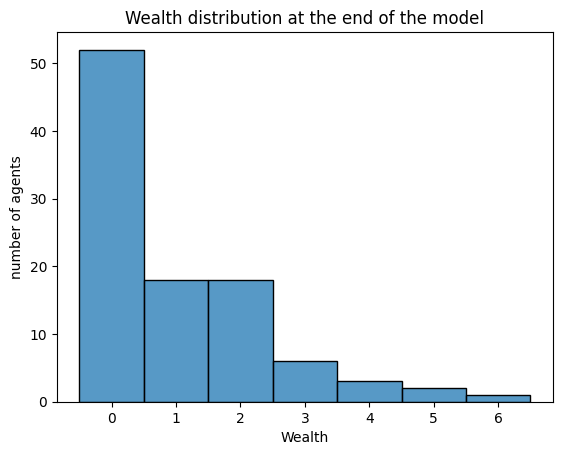

In [17]:
last_step = agent_wealth.index.get_level_values("Step").max()#gets the last step of the agent wealth index
end_wealth = agent_wealth.xs(last_step, level="Step")["Wealth"] #creates a new dataset 'end_wealth' using this last step data and only pulls the 'Wealth' column

g = sns.histplot(end_wealth, discrete=True) #create a histogram of the final wealth values at the end of the simulation
g.set(
    title="Wealth distribution at the end of the model",
    xlabel="Wealth",
    ylabel="number of agents"
)

[Text(0.5, 1.0, 'wealth of agent 7 over time')]

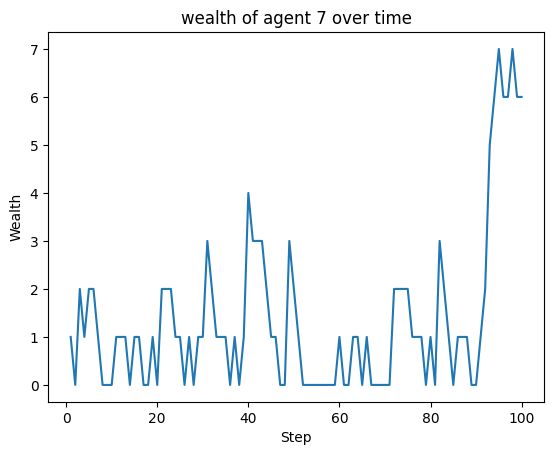

In [18]:
#to get the wealth of one agent, eg agent 7
one_agent_wealth = agent_wealth.xs(7, level="AgentID")

g = sns.lineplot(data=one_agent_wealth, x="Step", y="Wealth")
g.set(title="wealth of agent 7 over time")

[Text(0.5, 1.0, 'Wealth of multiple agents over time')]

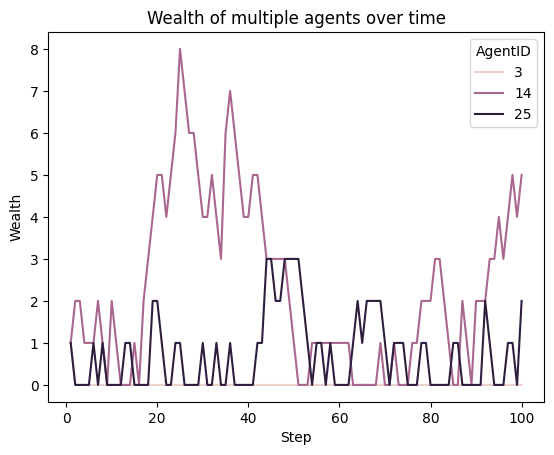

In [19]:
#plot multiple agents wealth over time, (doesn't seem to like plotting more than 6, starts averaging after that)

agent_list = [3, 14, 25]

multiple_agents_wealth = agent_wealth[
    agent_wealth.index.get_level_values("AgentID").isin(agent_list)
] #use the agents listed in agent_list and match against their agentID in the index, creating new dataset of these agents wealth

g = sns.lineplot(data=multiple_agents_wealth, x="Step", y="Wealth", hue="AgentID")
g.set(title="Wealth of multiple agents over time")

ValueError: Unable to parse string "Blue" at position 1

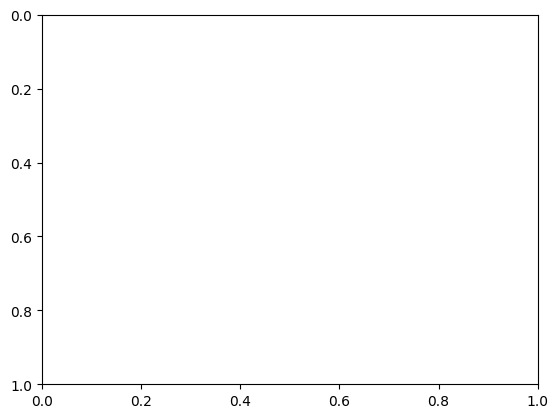

In [20]:
agent_wealth_long = agent_wealth.T.unstack().reset_index() #.T → Transposes the DataFrame (switches rows and columns), .unstack() → Reshapes a multi-index DataFrame into a long format,.reset_index() → Resets the index, converting index values into columns
agent_wealth_long.columns = ["Step", "AgentID", "Variable", "Value"] #renames the new columns -- variable likely wealth, and value is the wealth
agent_wealth_long.head(3)

g = sns.lineplot(data=agent_wealth_long, x="Step", y="Value", errorbar=("ci", 95)) #lineplot with 95% confidence interval
g.set(title="Average wealth over time")

#the result is exactly 1, as expected because each agent begins with 1 and gives 1 at each step

In [21]:
#create CSV files of the Gini and Agent Wealth data

gini.to_csv("model_data.csv")
agent_wealth.to_csv("agent_data.csv")

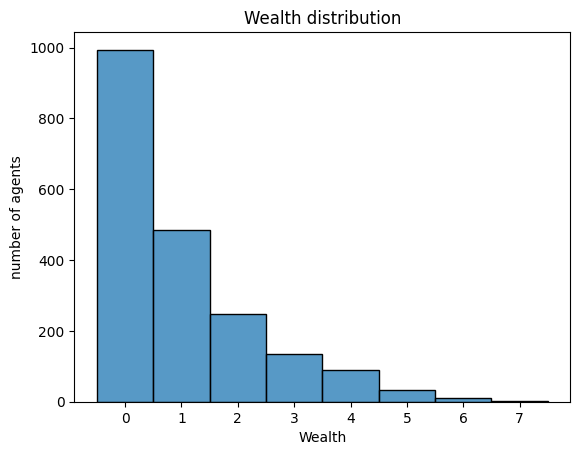

In [22]:
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()

data = model.datacollector.get_agent_vars_dataframe()
g = sns.histplot(data["Wealth"], discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

In [23]:
print(data.columns)

Index(['Wealth', 'Ethnicity', 'Steps_not_given'], dtype='object')


In [24]:
# Get the agent data as a DataFrame
agent_data = starter_model.datacollector.get_agent_vars_dataframe()

# Show the first few rows
print(agent_data.head(100))

              Wealth Ethnicity  Steps_not_given
Step AgentID                                   
1    1             1      Blue                0
     2             1     Green                0
     3             1     Mixed                0
     4             1     Mixed                0
     5             1      Blue                0
     6             1     Mixed                0
     7             1     Mixed                0
     8             1     Mixed                0
     9             1     Mixed                0
     10            1     Mixed                0


In [25]:
# Check for missing values
missing_ethnicity = agent_data[agent_data["Ethnicity"].isna()]
print(missing_ethnicity)  # Prints rows where Ethnicity is NaN

Empty DataFrame
Columns: [Wealth, Ethnicity, Steps_not_given]
Index: []


In [26]:
print(agent_data[["Wealth", "Ethnicity"]].reset_index())

   Step  AgentID  Wealth Ethnicity
0     1        1       1      Blue
1     1        2       1     Green
2     1        3       1     Mixed
3     1        4       1     Mixed
4     1        5       1      Blue
5     1        6       1     Mixed
6     1        7       1     Mixed
7     1        8       1     Mixed
8     1        9       1     Mixed
9     1       10       1     Mixed


In [27]:
print(data["Ethnicity"].value_counts())

Ethnicity
Green    780
Blue     700
Mixed    520
Name: count, dtype: int64


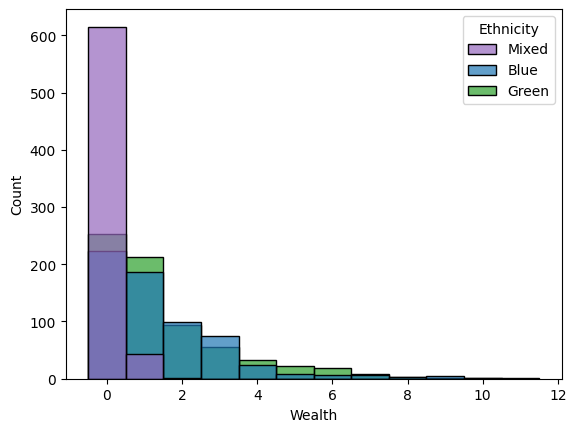

In [28]:
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()

data = model.datacollector.get_agent_vars_dataframe()
if 'Ethnicity' not in data.columns:
    # If not, print a warning and skip plotting with hue
    print("Warning: 'Ethnicity' column not found in data. Plotting without hue.")
palette = {"Green": "#2ca02c", "Blue": "#1f77b4", "Mixed": "#9467bd"}
sns.histplot(data=data, x="Wealth", hue="Ethnicity", discrete=True, palette=palette, alpha=0.7)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

In [29]:
params = {"width": 10, "height": 10, "n": range(5, 100, 5)}

results = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=5,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
) #set up parameters for batchrunning, then batch run using MoneyModel for 5 iterations with 100 steps per iteration

#this creates a list of dictionaries of the agents

  0%|          | 0/95 [00:00<?, ?it/s]

In [30]:
results_df = pd.DataFrame(results)
print(results_df.keys()) #this converts the dictionary above to a pandas data frame, and then prints its keys

Index(['RunId', 'iteration', 'Step', 'width', 'height', 'n', 'Gini', 'AgentID',
       'Wealth', 'Ethnicity', 'Steps_not_given'],
      dtype='object')


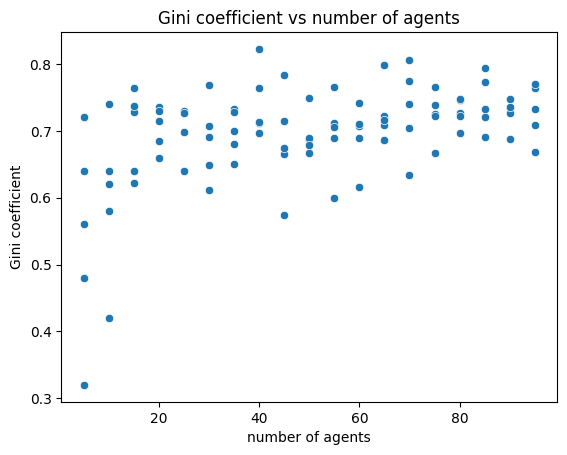

In [31]:
results_filtered = results_df[(results_df.AgentID == 1) & (results_df.Step == 100)] #this creates a dataset of agent 1 from each population and their data at the 100th step
results_filtered[["iteration", "n", "Gini"]].reset_index(
    drop=True #means to use this index and not an old one
).head()

g = sns.scatterplot(data=results_filtered, x="n", y="Gini") #create a scatterplot of n and gini coefficient
g.set(
      xlabel="number of agents",
      ylabel="Gini coefficient",
      title="Gini coefficient vs number of agents"
);

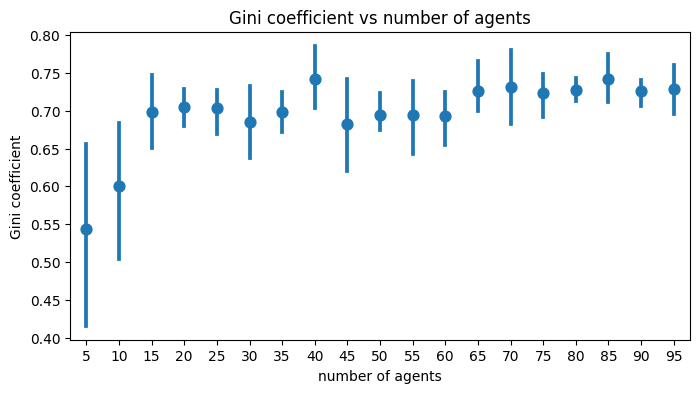

In [32]:
g = sns.pointplot(data=results_filtered, x="n", y="Gini", linestyle="None")
g.figure.set_size_inches(8, 4)
g.set(
    xlabel="number of agents",
    ylabel="Gini coefficient",
    title="Gini coefficient vs number of agents"
);#box & whisker plot (? called pointplot in training)

In [33]:
one_episode_wealth = results_df[(results_df.n == 10) & (results_df.iteration == 2)]
print(
    one_episode_wealth.to_string(
        index=False, columns=["Step", "AgentID", "Wealth"], max_rows=10
    )
) #create a dataset to contain agent ID, step and wealth

 Step  AgentID  Wealth
    0      NaN     NaN
    1      1.0     1.0
    1      2.0     1.0
    1      3.0     1.0
    1      4.0     1.0
  ...      ...     ...
  100      6.0     0.0
  100      7.0     0.0
  100      8.0     2.0
  100      9.0     3.0
  100     10.0     0.0


In [34]:
results_one_episode = results_df[
    (results_df.n == 10) & (results_df.iteration == 1) & (results_df.AgentID == 1)
]
print(results_one_episode.to_string(index=False, columns=["Step", "Gini"], max_rows=10)) #this is the evolution of one agent at each step w/ their corresponding gini

 Step  Gini
    1  0.54
    2  0.66
    3  0.64
    4  0.64
    5  0.66
  ...   ...
   96  0.58
   97  0.54
   98  0.54
   99  0.48
  100  0.64


In [35]:
#changing the number of iterations, seeing what larger does to the gini coefficient in bigger population

params = {"width": 10, "height": 10, "n": [5, 10, 20, 40, 80]} #n is diff population sizes eg of 5, of 20, of 80
results_5s = mesa.batch_run(
    MoneyModel,
    parameters=params,
    iterations=25,
    max_steps=100,
    number_processes=1,
    data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
    display_progress=True,
)

results_5s_df = pd.DataFrame(results_5s)

  0%|          | 0/125 [00:00<?, ?it/s]

In [36]:
# Again filter the results to only contain the data of one agent (the Gini coefficient will be the same for the entire population at any time)
results_5s_df_filtered = results_5s_df[(results_5s_df.AgentID == 1)]
results_5s_df_filtered.head(3)

,RunId,iteration,Step,width,height,n,Gini,AgentID,Wealth,Ethnicity,Steps_not_given
1,0,0,1,10,10,5,0.72,1.0,1.0,Blue,0.0
6,0,0,2,10,10,5,0.72,1.0,0.0,Blue,0.0
11,0,0,3,10,10,5,0.56,1.0,0.0,Blue,1.0


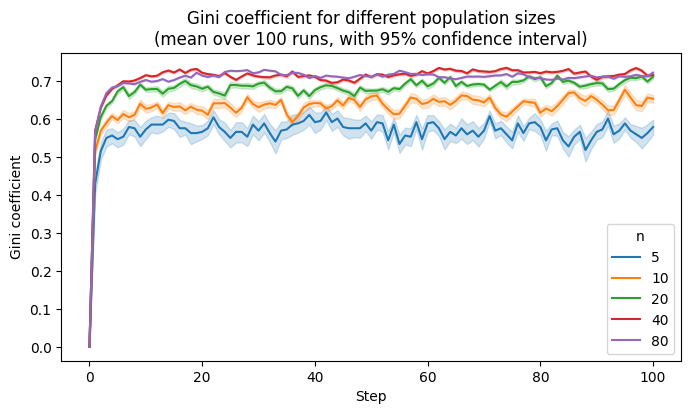

In [37]:
# Create a lineplot with error bars
g = sns.lineplot(
    data=results_5s_df,
    x="Step",
    y="Gini",
    hue="n",
    errorbar=("ci", 95),
    palette="tab10",
)
g.figure.set_size_inches(8, 4)
plot_title = "Gini coefficient for different population sizes\n(mean over 100 runs, with 95% confidence interval)"
g.set(title=plot_title, ylabel="Gini coefficient");

In [38]:
# Calculate the mean of the wealth and the number of consecutive rounds for all agents in each episode
agg_results_df = (
    results_5s_df.groupby(["iteration", "n", "Step"])
    .agg({"Wealth": "mean", "Steps_not_given": "mean"})
    .reset_index()
)
agg_results_df.head(3)

,iteration,n,Step,Wealth,Steps_not_given
0,0,5,0,NaN,NaN
1,0,5,1,1.0,0.0
2,0,5,2,1.0,0.0


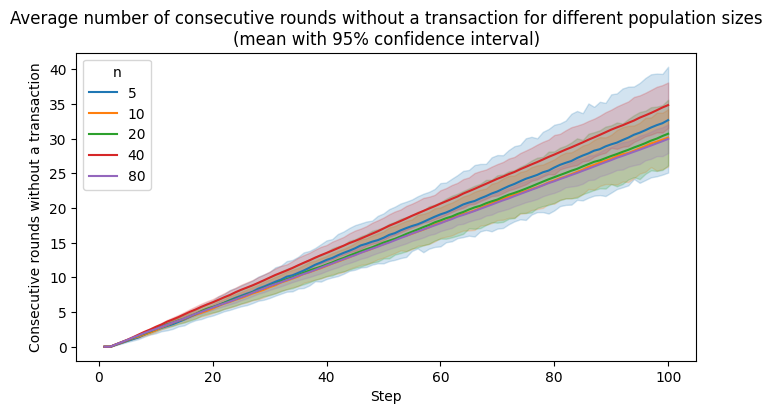

In [39]:
# Create a line plot with error bars
g = sns.lineplot(
    data=agg_results_df, x="Step", y="Steps_not_given", hue="n", palette="tab10"
)
g.figure.set_size_inches(8, 4)
g.set(
    title="Average number of consecutive rounds without a transaction for different population sizes\n(mean with 95% confidence interval)",
    ylabel="Consecutive rounds without a transaction",
);